In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [35]:
df = pd.read_csv("../data/master_dataset.csv")

### Normalization

In [36]:
# Read X and y
X = df.drop('High', axis=1)
y_archive = df["High"]
y = df['High'] - df["Open"]
y = pd.DataFrame(y)

# Remove any non-numeric cols
numeric_cols = X.select_dtypes(include=[np.number]).columns
X = X[numeric_cols]


In [37]:
# Remove high and close on current day
drop_mask = []

for col in X:
    if 'high' in str(col).lower():
        
        if 'lag' in str(col).lower():
            pass
        else:
            print(col)
            drop_mask.append(col)
    if 'low' in str(col).lower():
        
        if 'lag' in str(col).lower():
            pass
        else:
            print(col)
            drop_mask.append(col)

    if 'close' in str(col).lower():
        
        if 'lag' in str(col).lower():
            pass
        else:
            print(col)
            drop_mask.append(col)

# Drop elems in drop mask
X = X.drop(drop_mask, axis=1)
X.drop('Unnamed: 0', axis=1, inplace=True)

Low
Close
Adj Close
High_DXY
Low_DXY
Close_DXY
Adj Close_DXY
High_CHF
Low_CHF
High_BNO
Low_BNO
Close_BNO
Adj Close_BNO
High_GSCI
Low_GSCI
High_USL
Low_USL
Close_USL
Adj Close_USL


In [38]:

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3535, 38)
X_test shape: (884, 38)
y_train shape: (3535, 1)
y_test shape: (884, 1)


In [39]:
# Only fit the normalizers on the training data!
X_norm = MinMaxScaler().fit(X_train)
y_norm = MinMaxScaler().fit(y_train)

X_train_norm = X_norm.transform(X_train)
X_test_norm = X_norm.transform(X_test)

y_train_norm = y_norm.transform(y_train)
y_test_norm = y_norm.transform(y_test)

#### Variable Selection

In [40]:
data_x = pd.DataFrame(X_train_norm, columns=X_train.columns)
data_y = pd.DataFrame(y_train_norm, columns=['High-Open'])
data = data_x.copy()
data['High-Open'] = data_y
data
# print(data_y.columns)

,Open,Volume,Open_DXY,Volume_DXY,Open_lag_DXY,High_lag_DXY,Low_lag_DXY,Close_lag_DXY,Adj Close_lag_DXY,Volume_lag_DXY,...,Low_lag_GSCI,Open_USL,Volume_USL,Open_lag_USL,High_lag_USL,Low_lag_USL,Close_lag_USL,Adj Close_lag_USL,Volume_lag_USL,High-Open
0,0.558335,0.000655,0.737805,0.0,0.860465,0.620526,0.749433,0.459769,0.459769,0.386432,...,0.444785,0.000000,0.000000,0.503810,0.532961,0.645018,0.565336,0.565336,0.331289,0.014085
1,0.066200,0.085928,0.920746,0.0,0.604651,0.596659,0.630981,0.544828,0.544828,0.386432,...,0.338966,0.438411,0.021752,0.494286,0.539665,0.673801,0.607078,0.607078,0.317459,0.001100
2,0.081617,0.024491,0.861371,0.0,0.604651,0.596659,0.630981,0.544828,0.544828,0.386432,...,0.405867,0.234973,0.000335,0.537143,0.570950,0.664207,0.600726,0.600726,0.333773,0.026408
3,0.400640,0.003323,0.736492,0.0,0.511628,0.505966,0.489750,0.422987,0.422987,0.386432,...,0.424235,0.000000,0.000000,0.503810,0.532961,0.645018,0.565336,0.565336,0.331289,0.022888
4,0.584992,0.004857,0.668272,0.0,0.411628,0.429596,0.630981,0.556323,0.556323,0.386432,...,0.403652,0.574226,0.000039,0.599048,0.532961,0.718819,0.565336,0.565336,0.331003,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,0.088714,0.016948,0.847535,0.0,0.504651,0.577566,0.630981,0.600000,0.600000,0.386432,...,0.343493,0.254668,0.000433,0.525715,0.546369,0.664945,0.579855,0.579855,0.330673,0.038732
3531,0.642894,0.003194,0.665995,0.0,0.611628,0.572793,0.583145,0.487356,0.487356,0.386432,...,0.282953,0.632286,0.000158,0.685714,0.654749,0.785978,0.680581,0.680581,0.329838,0.028168
3532,0.105245,0.023348,0.826955,0.0,0.604651,0.596659,0.630981,0.544828,0.544828,0.386432,...,0.330056,0.277664,0.002896,0.514286,0.519553,0.661255,0.579855,0.579855,0.329552,0.014084
3533,0.025835,0.053752,0.810666,0.0,0.604651,0.596659,0.630981,0.544828,0.544828,0.386432,...,0.336125,0.242486,0.012748,0.497143,0.487151,0.619188,0.497278,0.497278,0.325484,0.011664


In [41]:
import statsmodels.api as sm

def forward_selection(data, response_col, alpha=0.05):
    selected_features = []
    remaining_features = list(data.columns.drop(response_col))

    while remaining_features:
        best_pvalue = float('inf')
        best_feature = None

        for feature in remaining_features:
            X = data[selected_features + [feature]]
            X = sm.add_constant(X)  # Add a constant term for the intercept
            y = data[response_col]

            model = sm.OLS(y, X).fit()
            pvalue = model.pvalues[feature]

            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature

        if best_pvalue < alpha:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            print(f"Added {best_feature} with p-value {best_pvalue:.4f}")
        else:
            break

    return selected_features

# Perform forward variable selection
response_column = 'High-Open'
selected_features = forward_selection(data, response_column)

print("Starting Columns:" , len(data.columns)-1)
print("Final Columns:" , len(selected_features))
# Print the selected features
print("Selected Features:", selected_features)

Added Open with p-value 0.0000
Added Open_BNO with p-value 0.0000
Added Open_USL with p-value 0.0000
Added High_lag_USL with p-value 0.0000
Added Volume with p-value 0.0001
Added Open_GSCI with p-value 0.0002
Added Price_GSCI with p-value 0.0000
Added Volume_USL with p-value 0.0000
Added Price_CHF with p-value 0.0005
Added High_lag_BNO with p-value 0.0083
Added Volume_BNO with p-value 0.0325
Starting Columns: 38
Final Columns: 11
Selected Features: ['Open', 'Open_BNO', 'Open_USL', 'High_lag_USL', 'Volume', 'Open_GSCI', 'Price_GSCI', 'Volume_USL', 'Price_CHF', 'High_lag_BNO', 'Volume_BNO']


In [42]:
# Apply variable selection subset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Only fit the normalizers on the training data!
X_norm = MinMaxScaler().fit(X_train)
y_norm = MinMaxScaler().fit(y_train)

X_train_norm = X_norm.transform(X_train)
X_test_norm = X_norm.transform(X_test)

y_train_norm = y_norm.transform(y_train)
y_test_norm = y_norm.transform(y_test)

### Linear Regression

Coefficients: [[ 0.2119352  -0.03841392  0.11071622 -0.12254779  0.46388613 -2.73415156
   2.6968675  -0.15245997  0.04406615  0.0496052  -0.06462629]]
Intercept: [0.01979599]
Mean Squared Error: 6.952027748775242 R^2: 0.4300640685954087


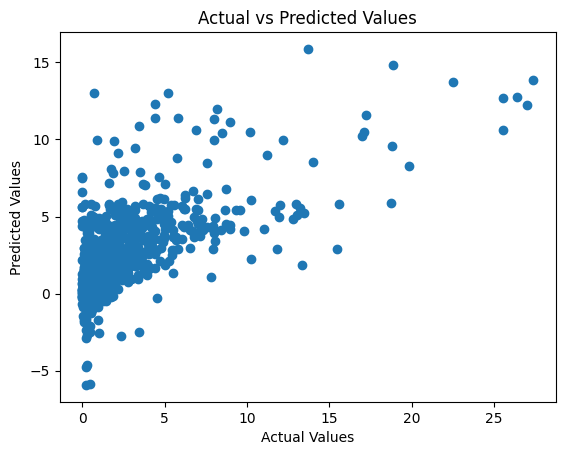

In [43]:
# Train a simple linear regression model to test efficacy
regressor = LinearRegression()
regressor.fit(X_train_norm, y_train_norm)

# Make predictions on the test set
y_pred_norm = regressor.predict(X_test_norm)

# Inverse transform the scaled predictions to get the original scale
y_pred = y_norm.inverse_transform(y_pred_norm)

# Print the coefficients and intercept
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse, "R^2:", r2)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [44]:
comp = y_test.copy()
comp["y_pred"] = y_pred
comp["Comp"] = y_archive
comp["Pred_Comp"] = X_test["Open"] + comp["y_pred"]
comp["Open"] = X_test["Open"]
comp

,0,y_pred,Comp,Pred_Comp,Open
1042,7.599976,4.326768,276.799988,273.526780,269.200012
1272,3.599976,1.777803,362.079987,360.257814,358.480011
1918,0.800019,2.548932,271.040009,272.788922,270.239990
1896,0.640015,1.533777,290.480011,291.373773,289.839996
4066,2.349999,1.637043,89.559998,88.847042,87.209999
...,...,...,...,...,...
2833,0.720002,1.249889,76.400002,76.929889,75.680000
564,1.599976,7.202315,893.599976,899.202315,892.000000
1779,2.720001,1.768105,274.399994,273.448098,271.679993
4387,0.479995,1.999550,81.139999,82.659554,80.660004


### Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train_norm, y_train_norm)

# Make predictions on the test set
y_pred_norm = rf_regressor.predict(X_test_norm)
# Inverse transform the scaled predictions to get the original scale
y_pred = y_norm.inverse_transform(y_pred_norm.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

c:\Users\vibkr\Desktop\Y2S1\Fin\USO_ETF_Day_Trading\uso_etf_venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 7.3057
R-squared: 0.4011


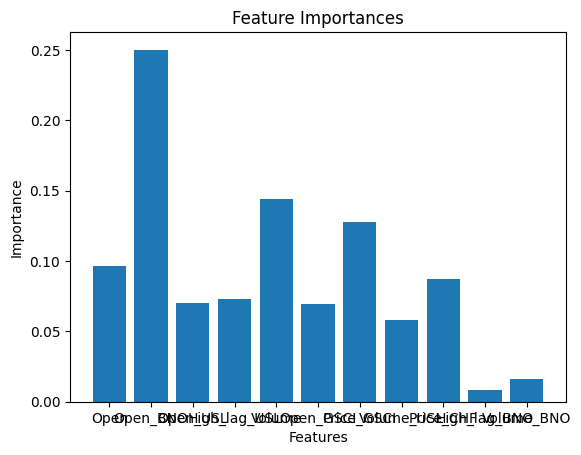

In [46]:
# Plot feature importances
feature_importances = rf_regressor.feature_importances_
feature_names = [i for i in X_train.columns] 

plt.bar(feature_names, feature_importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

<Axes: >

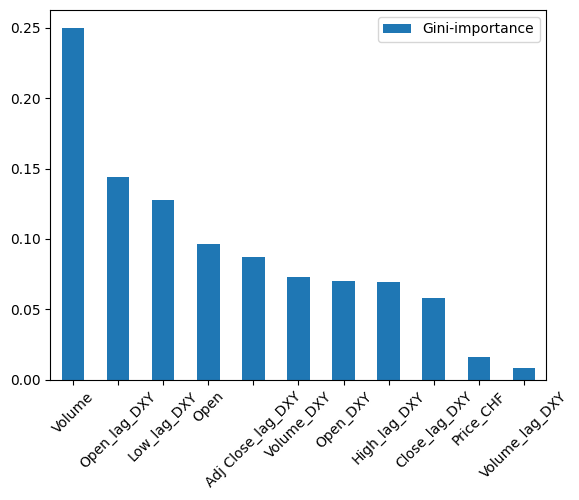

In [47]:
feats = {}

for feature, importance in zip(X.columns, rf_regressor.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False).plot(kind='bar', rot=45)

In [48]:
importances.sort_values('Gini-importance', ascending=False)

,Gini-importance
Volume,0.250148
Open_lag_DXY,0.144002
Low_lag_DXY,0.127571
Open,0.096319
Adj Close_lag_DXY,0.087282
Volume_DXY,0.072616
Open_DXY,0.070257
High_lag_DXY,0.069592
Close_lag_DXY,0.057640
Price_CHF,0.016109


In [54]:
# Hyperparam Tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the numerical features (in this case, all features are numerical)
numerical_features = X_train.columns

# Create a ColumnTransformer to apply scaling to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features)
    ])

# Instantiate the XGBoost regressor
# xg_reg = xgb.XGBRegressor()
rf_reg = RandomForestRegressor()

# Create the pipeline with preprocessing and XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', rf_reg)
])

# Define the parameter grid for random search
param_dist = {
    'regressor__n_estimators': [50, 100, 150, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None]
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Predict on the test set using the best model
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\vibkr\Desktop\Y2S1\Fin\USO_ETF_Day_Trading\uso_etf_venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vibkr\Desktop\Y2S1\Fin\USO_ETF_Day_Trading\uso_etf_venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vibkr\Desktop\Y2S1\Fin\USO_ETF_Day_Trading\uso_etf_venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Best Hyperparameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': None}
Mean Squared Error: 7.414523805288066


### XGBoost

In [51]:
import xgboost as xgb


xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the model to the training data
xgb_regressor.fit(X_train_norm, y_train_norm)

# Make predictions on the test set
y_pred_norm = xgb_regressor.predict(X_test_norm)
# Inverse transform the scaled predictions to get the original scale
y_pred = y_norm.inverse_transform(y_pred_norm.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 9.3683
R-squared: 0.2320


In [55]:
# Hyperparam Tuning

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the numerical features (in this case, all features are numerical)
numerical_features = X_train.columns

# Create a ColumnTransformer to apply scaling to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features)
    ])

# Instantiate the XGBoost regressor
xg_reg = xgb.XGBRegressor()

# Create the pipeline with preprocessing and XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xg_reg)
])

# Define the parameter grid for random search
param_dist = {
    'regressor__objective': ['reg:squarederror'],
    'regressor__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'regressor__max_depth': [3, 4, 5, 6, 7, 8, 9],
    'regressor__min_child_weight': [1, 2, 3, 4],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.8, 0.9, 1.0],
    'regressor__n_estimators': [50, 100, 150, 200]
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Predict on the test set using the best model
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'regressor__subsample': 1.0, 'regressor__objective': 'reg:squarederror', 'regressor__n_estimators': 200, 'regressor__min_child_weight': 2, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.1, 'regressor__colsample_bytree': 0.9}
Mean Squared Error: 7.122144186522102
